In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Another Approach to Regression

We can use the Nearest Neighbors approach to consider our earlier problem involving finding the line of best fit for the `mtcars` dataset.  Now, we want to assign $y$-values based on the nearest $k$ neighbors.  Plotting the result of two iterations with different values for $k$ surfaces important considerations.

In [4]:
mtcars = pd.read_csv('data/mtcars.csv')

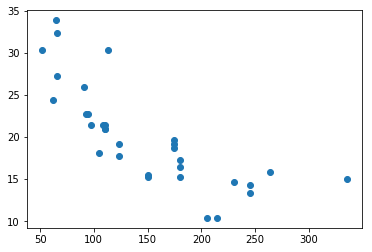

In [5]:
plt.scatter(mtcars['hp'], mtcars['mpg'])

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
X = mtcars['hp'].values.reshape(-1,1)
y = mtcars['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
regress = KNeighborsRegressor(n_neighbors=5)
regress2 = KNeighborsRegressor(n_neighbors=20)

In [9]:
regress.fit(X_train, y_train)
regress2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [10]:
pred_5 = regress.predict(X_test)
pred_20 = regress2.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
print('Error with 5 is', np.sqrt(mean_squared_error(pred_5, y_test)), 'and 20 is', np.sqrt(mean_squared_error(pred_20, y_test)))

Error with 5 is 2.9523888632766515 and 20 is 4.6157583342285164


In [13]:
x = mtcars.sort_values('hp')
y2 = regress.predict(x['hp'].values.reshape(-1,1))
y3 = regress2.predict(x['hp'].values.reshape(-1,1))

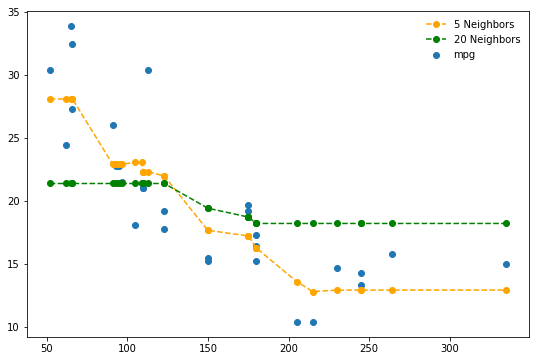

In [14]:
plt.figure(figsize = (9, 6))
plt.scatter(mtcars['hp'], mtcars['mpg']);
plt.plot(x['hp'], y2, '--o', color = 'orange', label = '5 Neighbors');
plt.plot(x['hp'], y3, '--o', color = 'green', label = '20 Neighbors');
plt.legend(frameon = False)

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {'n_neighbors': [i for i in range(3, 14)]}

In [17]:
# include scoring argument means it's choosing method based on mse not r2
grid = GridSearchCV(KNeighborsRegressor(), param_grid=params, scoring = 'mean_squared_error')

In [18]:
grid.fit(X_train, y_train)

/Users/karenhao/Documents/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/karenhao/Documents/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/karenhao/Documents/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/karenhao/Documents/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [19]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [20]:
best = grid.best_estimator_

In [21]:
best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
pred = best.predict(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [25]:
print("With KNNeighbors: {:.2f}".format(np.sqrt(mean_squared_error(pred, y_test))), "\nLinear Regression with OLS: {:.2f}".format(np.sqrt(mean_squared_error(pred_lr, y_test))))

With KNNeighbors: 2.58 
Linear Regression with OLS: 5.14


In [26]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()

In [29]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [34]:
X = iris.data
y = iris.target

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [39]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [40]:
y_pred

array([2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0])

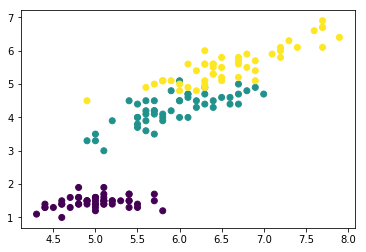

In [41]:
plt.scatter(X[:,0],X[:,2],c=y)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
# evaluate accuracy
accuracy_score(y_test,y_pred)

0.9473684210526315